If Using Google Collab

In [4]:
# !pip install numpy matplotlib
# !apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# Breath First Search Algorithm

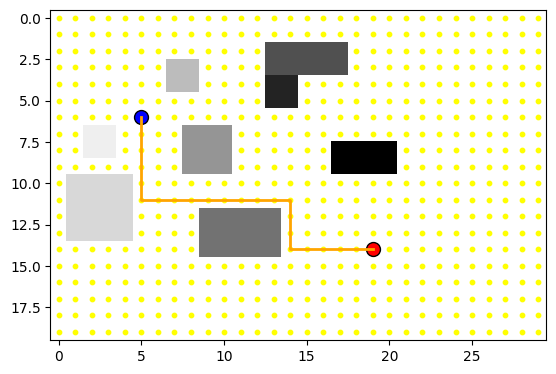

Path found: [(6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (14, 14), (14, 15), (14, 16), (14, 17), (14, 18), (14, 19)]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Function to find neighbors
def get_neighbors(node, grid):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    for direction in directions:
        neighbor = (node[0] + direction[0], node[1] + direction[1])
        if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
            neighbors.append(neighbor)
    return neighbors

# Breadth-First Search Algorithm
def bfs(grid, start, goal):
    rows, cols = grid.shape
    queue = deque([start])
    came_from = {start: None}
    visited = set([start])

    while queue:
        current_node = queue.popleft()

        if current_node == goal:
            break

        for neighbor in get_neighbors(current_node, grid):
            if grid[neighbor] > 0 or neighbor in visited:  # Obstacle or already visited
                continue
            visited.add(neighbor)
            queue.append(neighbor)
            came_from[neighbor] = current_node

    # Reconstruct path
    path = []
    node = goal
    if node not in came_from:
        return []  # Goal not reached, return empty path

    while node:
        path.append(node)
        node = came_from[node]
    path.reverse()
    return path

# Define the grid with different shaped obstacles
grid = np.zeros((20, 30))

# Adding different shaped obstacles
grid[7:9, 2:4] = 1
grid[10:14, 1:5] = 2
grid[3:5, 7:9] = 3
grid[7:10, 8:11] = 4
grid[12:15, 9:14] = 5
grid[2:4, 13:18] = 6
grid[4:6, 13:15] = 7
grid[8:10, 17:21] = 8

start = (6, 5)
goal = (14, 19)

# Run BFS Algorithm
path = bfs(grid, start, goal)

# Visualization
def plot_grid(grid, path=None):
    plt.imshow(grid, cmap='Greys', origin='upper')

    # Draw yellow dots for each coordinate not occupied by obstacles
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:
                plt.scatter(j, i, c='yellow', s=10)  # Yellow dot for each coordinate

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'orange', linewidth=2)  # Path line in orange

    plt.scatter(start[1], start[0], c='blue', marker='o', s=100, edgecolors='black')  # Start
    plt.scatter(goal[1], goal[0], c='red', marker='o', s=100, edgecolors='black')  # Goal
    plt.show()

plot_grid(grid, path)

# Check if path was found
if not path:
    print("No path found to the goal.")
else:
    print("Path found:", path)

ani = animation.FuncAnimation(fig, update_plot, frames=len(steps), interval=500, repeat=False)

# Save the animation to a file to ensure it renders
ani.save('pathfinding_animation_bfs.mp4', writer='ffmpeg')

# Display the animation
plt.show()


# Djikstra Algorithm

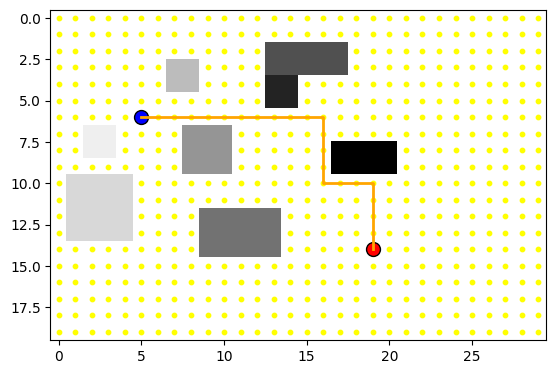

Path found: [(6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 16), (8, 16), (9, 16), (10, 16), (10, 17), (10, 18), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19)]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Function to find neighbors
def get_neighbors(node, grid):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    for direction in directions:
        neighbor = (node[0] + direction[0], node[1] + direction[1])
        if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
            neighbors.append(neighbor)
    return neighbors

# Dijkstra's Algorithm
def dijkstra(grid, start, goal):
    rows, cols = grid.shape
    distances = {node: float('inf') for node in np.ndindex(grid.shape)}
    distances[start] = 0
    priority_queue = [(0, start)]
    came_from = {start: None}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == goal:
            break

        for neighbor in get_neighbors(current_node, grid):
            if grid[neighbor] > 0:  # Obstacle (any value > 0)
                continue
            distance = current_distance + 1  # Assuming all steps cost 1
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                came_from[neighbor] = current_node

    # Reconstruct path
    path = []
    node = goal
    if node not in came_from:
        return []  # Goal not reached, return empty path

    while node:
        path.append(node)
        node = came_from[node]
    path.reverse()
    return path

# Define the grid with different shaped obstacles
grid = np.zeros((20, 30))

# Adding different shaped obstacles
grid[7:9, 2:4] = 1  
grid[10:14, 1:5] = 2 

grid[3:5, 7:9] = 3  
grid[7:10, 8:11] = 4  
grid[12:15, 9:14] = 5 

grid[2:4, 13:18] = 6  
grid[4:6, 13:15] = 7  
grid[8:10, 17:21] = 8

start = (6, 5)
goal = (14, 19)

# Run Dijkstra's Algorithm
path = dijkstra(grid, start, goal)

# Visualization
def plot_grid(grid, path=None):
    plt.imshow(grid, cmap='Greys', origin='upper')

    # Draw yellow dots for each coordinate not occupied by obstacles
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:
                plt.scatter(j, i, c='yellow', s=10)  # Yellow dot for each coordinate

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'orange', linewidth=2)  # Path line in orange

    plt.scatter(start[1], start[0], c='blue', marker='o', s=100, edgecolors='black')  # Start
    plt.scatter(goal[1], goal[0], c='red', marker='o', s=100, edgecolors='black')  # Goal
    plt.show()

plot_grid(grid, path)

# Check if path was found
if not path:
    print("No path found to the goal.")
else:
    print("Path found:", path)

ani = animation.FuncAnimation(fig, update_plot, frames=len(steps), interval=500, repeat=False)

# Save the animation to a file to ensure it renders
ani.save('pathfinding_animation_bfs.mp4', writer='ffmpeg')

# Display the animation
plt.show()  


Why Djikstra and BFS have different path because for the djikstra itself have cost 1 and -1, and for BFS avoid the cost but have direction (N, NE, E, SE, S, SW, W, NW)